In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("data.csv", header=None)

In [3]:
data

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [4]:
X = np.array(data[[0,1]])

In [5]:
y = np.array(data[2])

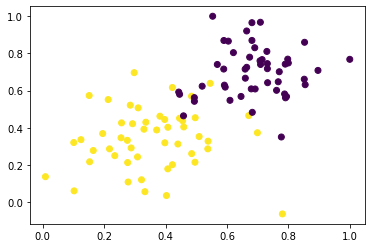

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
Wx + b

In [22]:
# Probability and score
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights)+bias)

In [23]:
# Cross entropy formula
def error_formula(y, output):
    return -y*np.log(output) - (1-y)*np.log(1-output)

Loss Function: is the general name for the error functions.
In this binary classification problem, and many others, we use Cross Entropy as Loss function. 

In general, a loss is something that you want to minimize.

In [39]:
def update_weights(x, y, weights, bias, learning_rate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights = weights + learning_rate*d_error*x
    bias = bias + learning_rate*d_error
    return weights, bias

In [25]:
X.shape


(100, 2)

In [26]:
weights = np.random.normal(size=X.shape[1])
bias = 0
out = output_formula(X, weights, bias)
loss = error_formula(y, out)

In [31]:
np.mean(out > 0.5)

0.01

In [47]:
out

array([0.37918084, 0.45945094, 0.43923947, 0.46071537, 0.42613862,
       0.45821286, 0.4620115 , 0.43617919, 0.45410858, 0.46712043,
       0.50075881, 0.48566914, 0.46637264, 0.43461168, 0.43741575,
       0.43725538, 0.4261614 , 0.45549344, 0.44479132, 0.45448982,
       0.44256764, 0.45915925, 0.42962064, 0.48910739, 0.39762983,
       0.46404493, 0.48509158, 0.47850909, 0.44892384, 0.42083981,
       0.47508781, 0.43775526, 0.47506756, 0.43318803, 0.46541621,
       0.47036294, 0.40323805, 0.44747099, 0.42130672, 0.42849747,
       0.44798815, 0.42488823, 0.45161353, 0.44350358, 0.48495428,
       0.47941833, 0.43565506, 0.46338297, 0.460034  , 0.44284054,
       0.42904242, 0.43995287, 0.3790771 , 0.41923169, 0.40174082,
       0.35896809, 0.39939817, 0.40740803, 0.38743444, 0.40108269,
       0.43134075, 0.38944369, 0.40410218, 0.40805274, 0.3862897 ,
       0.40201635, 0.41710682, 0.43166275, 0.3856523 , 0.38862533,
       0.40488318, 0.40217736, 0.41095515, 0.40786711, 0.40853

In [35]:
np.mean((out > 0.5) == y)

0.51

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
import time
np.random.seed(42)

epochs = 1000
learning_rate = 0.01

def train(train_features, train_targets, test_features, test_targets, epochs, learning_rate):
    weights = np.random.normal(size=train_features.shape[1])
    bias = 0
    errors = []
    test_errors = []
    for epoch in range(epochs):
        for x, y in zip(train_features, train_targets):
            output = output_formula(x, weights, bias)
            weights, bias = update_weights(x, y, weights, bias, learning_rate)
        # at the end of one epoch
        out = output_formula(train_features, weights, bias)
        loss = np.mean(error_formula(train_targets, out))
        errors.append(loss)
        out_test = output_formula(test_features, weights, bias)
        loss_test = np.mean(error_formula(test_targets, out_test))
        test_errors.append(loss_test)
        
        if epoch % 10 == 0:
            print("Epoch:", epoch)
            print("Train loss", loss)
            predictions = out > 0.5
            accuracy = np.mean(predictions == train_targets)
            print("Train Accuracy", accuracy)
            print("Test loss", loss_test)
            predictions = out_test > 0.5
            accuracy = np.mean(predictions == test_targets)
            print("Test Accuracy", accuracy)
        plt.plot(errors)
        plt.plot(test_errors)
        
        
        
        
        

Epoch: 0
Train loss 0.7117483654726598
Train Accuracy 0.3
Test loss 0.7023157933365239
Test Accuracy 0.3333333333333333
Epoch: 10
Train loss 0.6445552413143899
Train Accuracy 0.5428571428571428
Test loss 0.6430783262870947
Test Accuracy 0.5333333333333333
Epoch: 20
Train loss 0.6026193327619113
Train Accuracy 0.6571428571428571
Test loss 0.5857879311488109
Test Accuracy 0.7
Epoch: 30
Train loss 0.5661689745803781
Train Accuracy 0.7285714285714285
Test loss 0.5355808924857777
Test Accuracy 0.7666666666666667
Epoch: 40
Train loss 0.5344890307069268
Train Accuracy 0.8
Test loss 0.4926844780546055
Test Accuracy 0.8333333333333334
Epoch: 50
Train loss 0.5068603906363077
Train Accuracy 0.8571428571428571
Test loss 0.455948311998732
Test Accuracy 0.9
Epoch: 60
Train loss 0.48265857397336703
Train Accuracy 0.9
Test loss 0.4243171330894691
Test Accuracy 0.9333333333333333
Epoch: 70
Train loss 0.46135690060216106
Train Accuracy 0.9285714285714286
Test loss 0.39691477758871613
Test Accuracy 0.933

Epoch: 610
Train loss 0.2256897793838075
Train Accuracy 0.9142857142857143
Test loss 0.11813494750092375
Test Accuracy 0.9666666666666667
Epoch: 620
Train loss 0.22480604910839425
Train Accuracy 0.9142857142857143
Test loss 0.11711382497630021
Test Accuracy 0.9666666666666667
Epoch: 630
Train loss 0.2239481714550585
Train Accuracy 0.9142857142857143
Test loss 0.11612122618690979
Test Accuracy 0.9666666666666667
Epoch: 640
Train loss 0.22311504855456035
Train Accuracy 0.9142857142857143
Test loss 0.11515593978074469
Test Accuracy 0.9666666666666667
Epoch: 650
Train loss 0.2223056436717026
Train Accuracy 0.9142857142857143
Test loss 0.11421682293920571
Test Accuracy 0.9666666666666667
Epoch: 660
Train loss 0.22151897701238302
Train Accuracy 0.9142857142857143
Test loss 0.11330279657513981
Test Accuracy 0.9666666666666667
Epoch: 670
Train loss 0.2207541218707285
Train Accuracy 0.9142857142857143
Test loss 0.11241284092943835
Test Accuracy 0.9666666666666667
Epoch: 680
Train loss 0.2200102

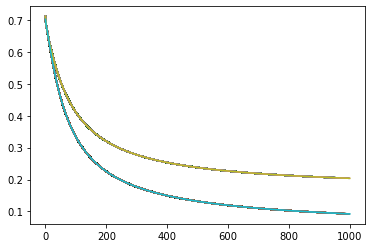

In [61]:
train(X_train, y_train, X_test, y_test, epochs, learning_rate)

In [15]:
w1x1+w2x2

[(array([ 0.78051 , -0.063669]), 1),
 (array([0.28774, 0.29139]), 1),
 (array([0.40714, 0.17878]), 1),
 (array([0.2923, 0.4217]), 1),
 (array([0.50922, 0.35256]), 1),
 (array([0.27785, 0.10802]), 1),
 (array([0.27527, 0.33223]), 1),
 (array([0.43999, 0.31245]), 1),
 (array([0.33557, 0.42984]), 1),
 (array([0.23448, 0.24986]), 1),
 (array([0.0084492, 0.13658  ]), 1),
 (array([0.12419, 0.33595]), 1),
 (array([0.25644, 0.42624]), 1),
 (array([0.4591 , 0.40426]), 1),
 (array([0.44547, 0.45117]), 1),
 (array([0.42218, 0.20118]), 1),
 (array([0.49563, 0.21445]), 1),
 (array([0.30848, 0.24306]), 1),
 (array([0.39707, 0.44438]), 1),
 (array([0.32945, 0.39217]), 1),
 (array([0.40739, 0.40271]), 1),
 (array([0.3106 , 0.50702]), 1),
 (array([0.49638, 0.45384]), 1),
 (array([0.10073, 0.32053]), 1),
 (array([0.69907, 0.37307]), 1),
 (array([0.29767, 0.69648]), 1),
 (array([0.15099, 0.57341]), 1),
 (array([0.16427, 0.27759]), 1),
 (array([0.33259 , 0.055964]), 1),
 (array([0.53741, 0.28637]), 1),
 (